In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/cleaned_student_lifestyle_dataset.csv')

In [3]:
df.head()

,student_id,study_hours_per_day,extracurricular_hours_per_day,sleep_hours_per_day,social_hours_per_day,physical_activity_hours_per_day,gpa,stress_level,stress_level_numeric,gpa_group
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate,2,2.5-3
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low,1,2.5-3
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low,1,2.5-3
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate,2,2.5-3
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High,3,3.5-4


first of all let's create chart to understand which result we will likely to get

# Plot 1. MEAN COMPARISON: Sleep hours by stress level

/tmp/ipykernel_38170/1164886793.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stress_level', y='sleep_hours_per_day', data=df, palette='Set2')


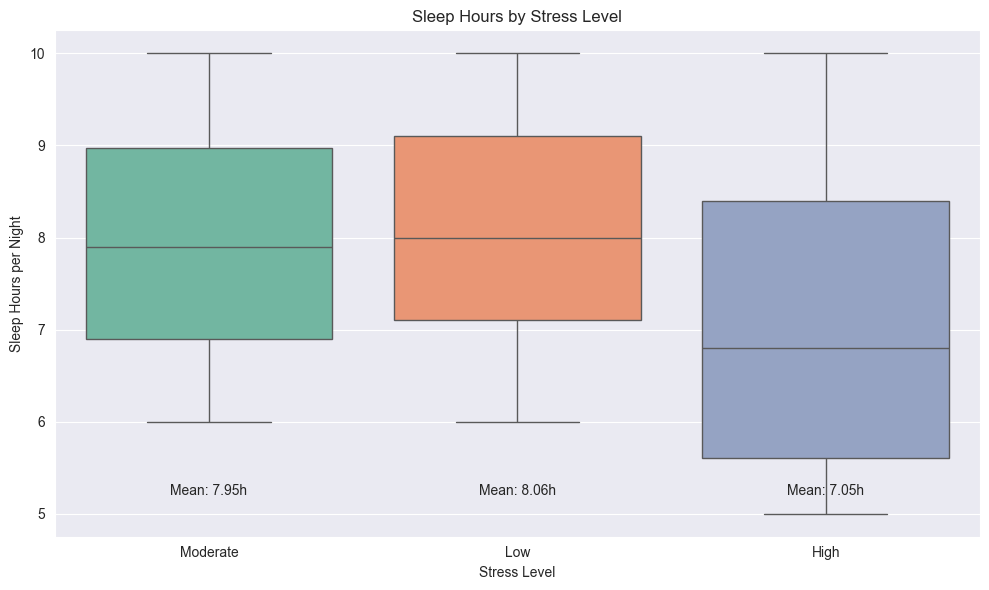

In [4]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='stress_level', y='sleep_hours_per_day', data=df, palette='Set2')
plt.title('Sleep Hours by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Hours per Night')

for i, level in enumerate(df['stress_level'].unique()):
    mean = df[df['stress_level'] == level]['sleep_hours_per_day'].mean()
    plt.text(i, df['sleep_hours_per_day'].min() + 0.2, f'Mean: {mean:.2f}h', ha='center')

plt.tight_layout()
plt.show()

# PLOT 2: Proportion Comparison - High GPA by study hours


Create study hours groups

In [5]:
 df['study_hours_group'] = pd.cut(df['study_hours_per_day'],
                                    bins=[0, 2, 4, float('inf')],
                                    labels=['Low (≤2h)', 'Medium (2-4h)', 'High (>4h)'])

In [6]:
df["high_gpa"] = (df["gpa"] >= 3.5).astype(int)

Calculate proportions

In [7]:
prop_data = df.groupby('study_hours_group')['high_gpa'].agg(['mean', 'count']).reset_index()
prop_data.columns = ['Study Hours Group', 'Proportion of High GPA', 'Sample Size']

/tmp/ipykernel_38170/889429047.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop_data = df.groupby('study_hours_group')['high_gpa'].agg(['mean', 'count']).reset_index()


Create bar chart plot


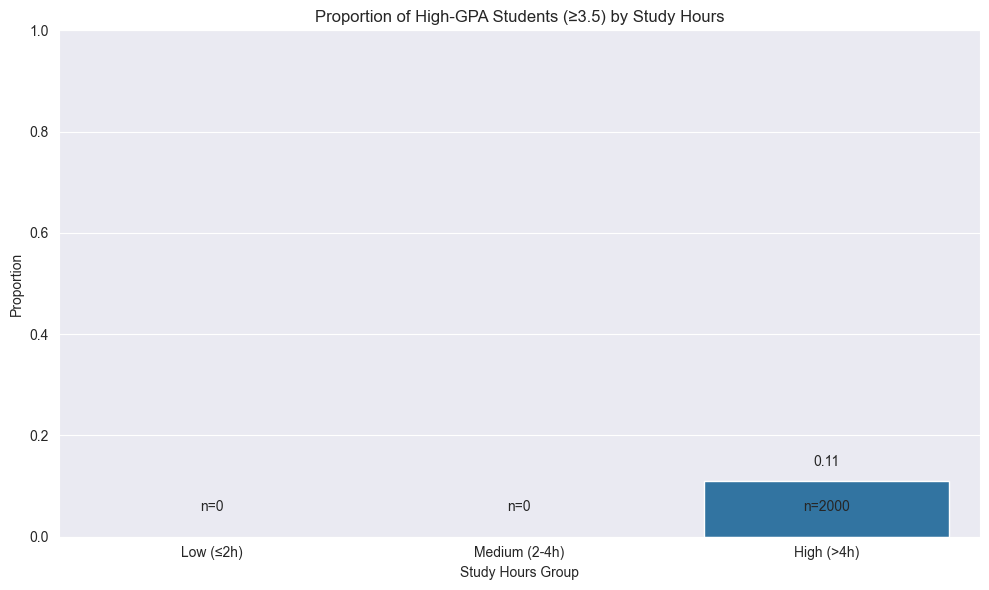

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Study Hours Group', y='Proportion of High GPA', data=prop_data)
plt.title('Proportion of High-GPA Students (≥3.5) by Study Hours')
plt.ylabel('Proportion')
plt.ylim(0, 1)

for i, row in enumerate(prop_data.itertuples()):
    plt.text(i, 0.05, f'n={row._3}', ha='center')
    plt.text(i, row._2 + 0.03, f'{row._2:.2f}', ha='center')

plt.tight_layout()
plt.show()
